# Calculating the bead diameter to an order of magnitude or better

In [92]:
# Inserting packages needed

import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Inserting equation as function

def diameter(Lambda,grad_I,I,n_w):
    d_cubed = (3*(Lambda**4)*grad_I) / (8*I*n_w*np.pi**4)
    return (d_cubed)**(1/3)

## Question - what values should are unknowns take?

Text(0, 0.5, 'Diameter of Silica Bead (Microns)')

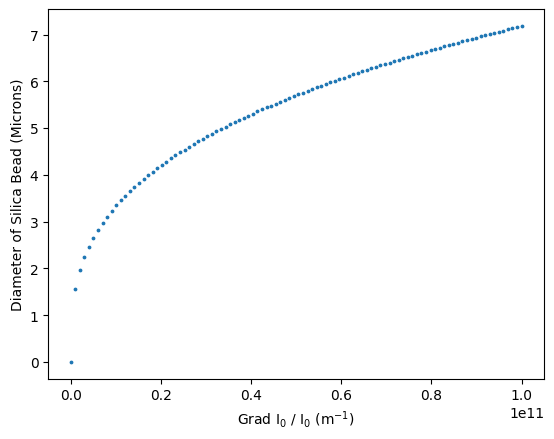

In [94]:
# Test above function with some guesses 

I_grad_ = np.linspace(0,100,100)*1e6
I_ = 1e-3

Lambda_ = 1064e-9
n_w_ = 1.33

plt.scatter(I_grad_ / I_, diameter(Lambda_,I_grad_,I_,n_w_) * 1e6, s = 3)
plt.xlabel('Grad I$_0$ / I$_0$ (m$^{-1}$)')
plt.ylabel('Diameter of Silica Bead (Microns)')

Therefore we expect the ratio of Grad I / I to be in the order of 10^11 per meter 

## Next - Try to estimate unknowns from what we know

In [95]:
# Import lengths and waists for red laser

lengths = np.array([20.8, 19.2, 17.6, 16. , 14.4 ,12.8 ,11.2 , 9.6,  8. ,  6.4 , 4.8 , 3.2 , 1.6 , 0.,
 -1.6, -3.2, -4.8 ,-6.4, -8. , -9.6])

waists = np.array([8.68577542, 8.18737089, 6.91910359 ,7.05109426 ,6.7586193 , 6.15191061,
 5.89479558, 5.46070708 ,5.03603 ,   4.57278342 ,4.21814984 ,3.86467496,
 3.69348506, 3.62374908, 3.72650088 ,3.87116885, 4.0733677,  4.41851506,
 4.73763834 ,5.67559103])

In [96]:
## BIG ASSUMPTION - gradient of I is proportional to waist

waist_min = 3.64e-6  #metres

# Some guesses at other quantities 

power = 50e-3
area = np.pi * waist_min**2 # area of cross section of beam

# Therefore

I_nought = power / area

''' This is probably wrong!!'''
grad_I_nought = (I_nought / area) * waist_min

In [97]:
print('Grad I is {} 10^14 W m^-3'.format(grad_I_nought*10**(-14)))
print('I is {} 10^9 W m^-3'.format(I_nought*10**(-9)))

Grad I is 1.0504275605162139 10^14 W m^-3
I is 1.201205644637539 10^9 W m^-3


In [98]:
diam_estimate = diameter(Lambda_,grad_I_nought,I_nought,n_w_)

In [99]:
print('With the approx values above the diameter estimate for the glass bead is {} microns'.format(diam_estimate*1e6))

With the approx values above the diameter estimate for the glass bead is 0.0687118746028082 microns


## Question - how do variables affect this value?

In [100]:
power_array = np.linspace(1,100,100)*1e-3 # power from 1-100mW
Grad_array = np.linspace(1,100,100)*1e13 # grad I with estimate within the range

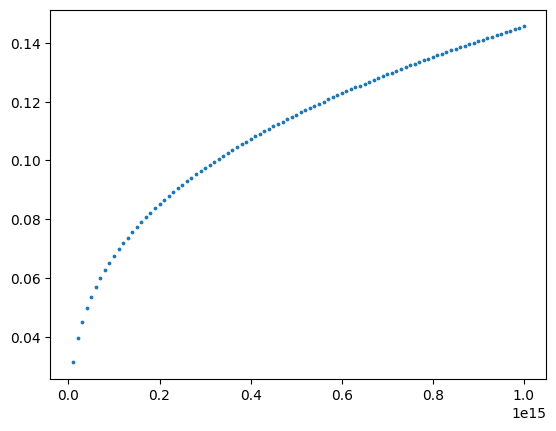

In [101]:
plt.scatter(Grad_array,diameter(Lambda_,Grad_array,I_nought,n_w_)*10**6,s = 3)

## Question - is this bead a raleigh particle?

### d / lambda < 0.1

In [102]:
print('The Raleigh Ratio is {}'.format(diam_estimate / Lambda_))
print('As this value is less than 0.1, this particle is a Raleigh particle :)')

The Raleigh Ratio is 0.06457882951391747
As this value is less than 0.1, this particle is a Raleigh particle :)
